In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])

In [6]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
filt = miami_df[miami_df['sqft'].str.contains('nan')]
miami_df.drop(index = filt.index, inplace = True)

miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])

miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 1832
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  616 non-null    object 
 1   br            616 non-null    int64  
 2   ba            616 non-null    float64
 3   sqft          616 non-null    float64
 4   housingType   616 non-null    object 
 5   laundry       616 non-null    object 
 6   parking       616 non-null    object 
 7   cats          616 non-null    object 
 8   dogs          616 non-null    object 
 9   furnished     616 non-null    object 
 10  rent          616 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 57.8+ KB


In [7]:
miami_df.describe()

,br,ba,sqft,rent
count,616.000000,616.000000,616.000000,616.000000
mean,1.683442,1.609578,1021.472403,2441.290584
std,0.913557,0.597221,413.481218,919.698882
min,0.000000,1.000000,235.000000,525.000000
25%,1.000000,1.000000,741.500000,1700.000000
50%,2.000000,2.000000,950.000000,2292.500000
75%,2.000000,2.000000,1250.000000,3158.250000
max,5.000000,4.000000,2921.000000,4900.000000


In [ ]:
plt.figure()
plt.scatter(miami_df['sqft'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="sqft")
plt.xlabel("Square Footage")
plt.ylabel("Rental Price")
plt.title("Sq Ft vs. Rental Price")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(miami_df['br'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="bedroom(s)")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("Bedrooms vs. Rental Price")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.scatter(miami_df['neighborhood'],miami_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("Neighborhood vs. Rental Price")
plt.legend()
plt.show()

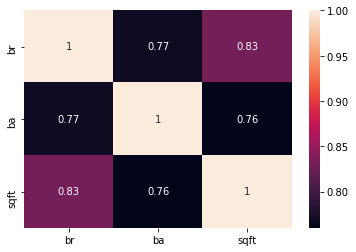

In [8]:
import seaborn as sn
## keep only numerical columns
X = (miami_df[["br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
## correlation matrix
corrMatrix = X.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [10]:
X = miami_df["sqft"].values.reshape(-1, 1)
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(616, 1) (616, 1)


In [11]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

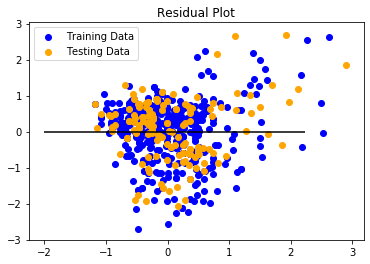

In [13]:
# Fit the Model to the scaled training data and make predictions using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [22]:
# Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
errors = abs(predictions - y_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE,2)}\nR2: {round(r2, 2)}")

MSE: 0.69
R2: 0.31


In [23]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0] - y_test_scaled[0]}")

True output: [2241]
Predicted output: [0.25941907]
Prediction Error: [-0.59901342]


In [24]:
df = pd.DataFrame({'Predicted': predictions.ravel(), 'Actual': y_test.ravel(), 'Abs Error': errors.ravel()})
df

,Predicted,Actual,Abs Error
0,0.259419,3230,0.599013
1,-0.317659,3100,1.034596
2,-0.013934,2200,0.248714
3,-0.487746,3600,1.748896
4,0.289792,2000,0.770125
...,...,...,...
149,0.181969,3200,0.643811
150,-0.089865,1800,0.608154
151,-0.241728,1900,0.347448
152,-0.314622,1742,0.446526


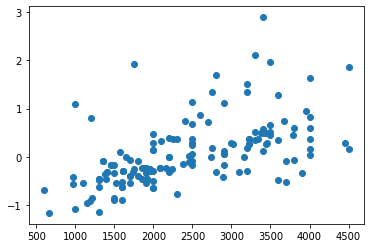

In [25]:
plt.scatter(y_test, predictions)